In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
audi = pd.read_csv('audi.csv')

In [4]:
audi.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4


In [5]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [6]:
audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [7]:
audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


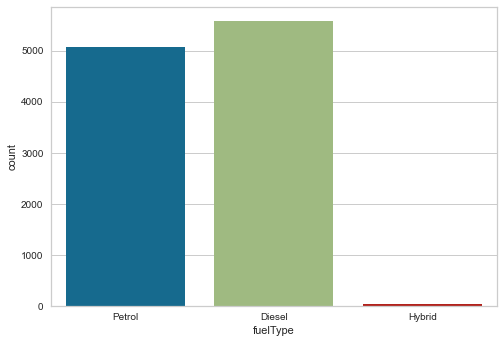

In [8]:
sns.countplot(audi['fuelType'])

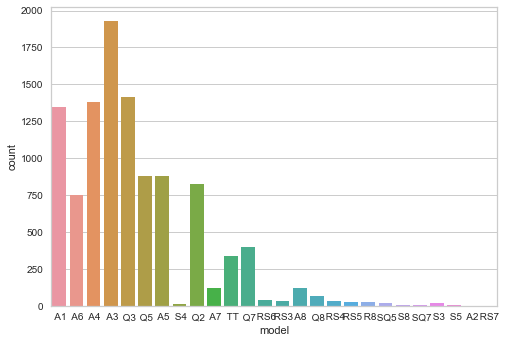

In [9]:
sns.countplot(audi['model'])

In [10]:
audi['model'].unique()

array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
       ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
       ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7'],
      dtype=object)

In [11]:
audi['model'].value_counts()

 A3     1929
 Q3     1417
 A4     1381
 A1     1347
 A5      882
 Q5      877
 Q2      822
 A6      748
 Q7      397
 TT      336
 A7      122
 A8      118
 Q8       69
 RS6      39
 RS3      33
 RS4      31
 RS5      29
 R8       28
 S3       18
 SQ5      16
 S4       12
 SQ7       8
 S8        4
 S5        3
 RS7       1
 A2        1
Name: model, dtype: int64

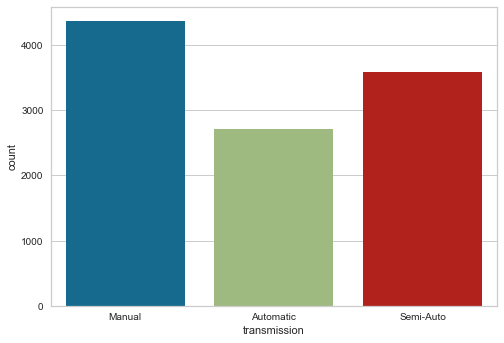

In [13]:
sns.countplot(audi['transmission'])

In [14]:
audi['transmission'] = audi['transmission'].astype('category')
audi['transmission'] = audi['transmission'].cat.codes

In [15]:
audi['fuelType'] = audi['fuelType'].astype('category')
audi['fuelType'] = audi['fuelType'].cat.codes

In [16]:
audi.head(3)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,1,15735,2,150,55.4,1.4
1,A6,2016,16500,0,36203,0,20,64.2,2.0
2,A1,2016,11000,1,29946,2,30,55.4,1.4


In [17]:
audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  int8   
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  int8   
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), int8(2), object(1)
memory usage: 604.4+ KB


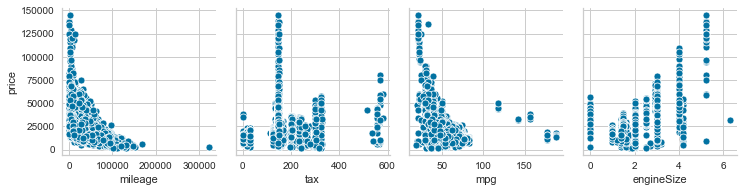

In [20]:
sns.pairplot(audi,x_vars=['mileage','tax','mpg','engineSize'],y_vars='price')

In [25]:
audi.iloc[:,3:].corr()

,transmission,mileage,fuelType,tax,mpg,engineSize
transmission,1.000000,-0.042341,0.082359,-0.000919,-0.014149,-0.020070
mileage,-0.042341,1.000000,-0.240984,-0.166547,0.395103,0.070710
fuelType,0.082359,-0.240984,1.000000,0.101257,-0.301099,-0.370507
tax,-0.000919,-0.166547,0.101257,1.000000,-0.635909,0.393075
mpg,-0.014149,0.395103,-0.301099,-0.635909,1.000000,-0.365621
engineSize,-0.020070,0.070710,-0.370507,0.393075,-0.365621,1.000000


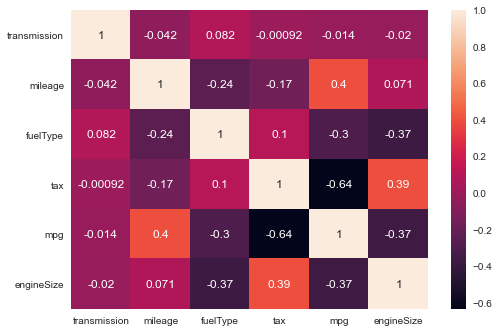

In [27]:
sns.heatmap(audi.iloc[:,3:].corr(),annot=True)

In [28]:
audi.drop('model',axis=1,inplace=True)

In [30]:
audi.head(2)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12500,1,15735,2,150,55.4,1.4
1,2016,16500,0,36203,0,20,64.2,2.0


In [31]:
X = audi.drop('price',axis=1)
y = audi['price']

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

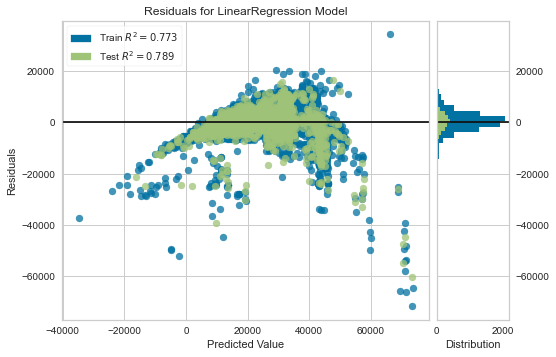

In [33]:
model = LinearRegression()
visual = ResidualsPlot(model)
visual.fit(X_train,y_train)
visual.score(X_test,y_test)
visual.poof()

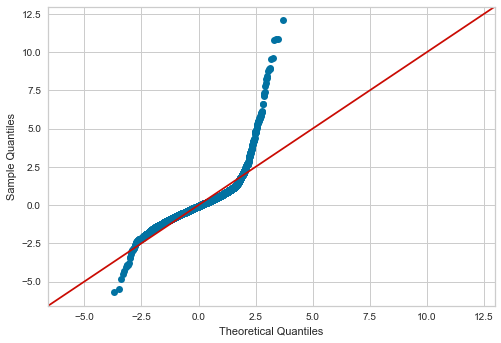

In [34]:
lin_reg = sm.OLS(y_train,X_train).fit()
res = lin_reg.resid
sm.qqplot(res,fit=True,line='45')
plt.show()

In [35]:
lin_reg = sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                          1.987e+04
Date:                Sun, 05 Dec 2021   Prob (F-statistic):                        0.00
Time:                        19:12:14   Log-Likelihood:                         -86561.
No. Observations:                8534   AIC:                                  1.731e+05
Df Residuals:                    8527   BIC:                                  1.732e+05
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
year            11.4277      0.330     34.655      0.000      10.781      12.074
transmission    -0.0296     87.501     -0.000      1.000    -171.553     171.494
mileage         -0.2418      0.003    -76.063      0.000      -0.248      -0.236
fuelType      -103.6756     83.275     -1.245      0.213    -266.914      59.563
tax            -21.5561      1.310    -16.451      0.000     -24.125     -18.987
mpg           -245.0243      7.918    -30.947      0.000    -260.545    -229.504
engineSize     1.09e+04    147.500     73.927      0.000    1.06e+04    1.12e+04
==============================================================================
Omnibus:                     5547.641   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           160080.736
Skew:                           2.671   Prob(JB):                         0.00
Kurtosis:                      23.534   Cond. No.                     8.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
len(audi)

10668

In [37]:
len(X_test),len(X_train)

(2134, 8534)

In [38]:
len(y_test),len(y_train)

(2134, 8534)

In [39]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
pred = linear_reg.predict(X_test)
pred

array([ 9211.30937633, 24275.69874091, 28972.31474552, ...,
       15779.83463366, 24444.2622242 , 12970.10801917])

In [41]:
X_test.columns

Index(['year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg',
       'engineSize'],
      dtype='object')

In [42]:
audi.head(2)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12500,1,15735,2,150,55.4,1.4
1,2016,16500,0,36203,0,20,64.2,2.0


In [43]:
linear_reg.predict([[2017,1,15000,2,100,50.5,1.4]])

array([18478.6209923])

In [44]:
linear_reg.predict([[2017,1,15735,2,150,55.4,1.4]])

array([16820.69369157])

In [46]:
linear_reg.predict([[2016,0,36203,0,20,64.2,2.0]])

array([18900.53006551])

In [47]:
from sklearn.metrics import r2_score

In [48]:
r2_score(y_test,pred)

0.7885313801366965

In [75]:
def mean_absolute_percentage_error(y_true,pred):
    return np.mean(np.abs((y_true-pred)/y_true))*100

In [76]:
mean_absolute_percentage_error(y_test,pred)

17.168426754299965

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
audi1 = pd.read_csv('audi.csv')

In [50]:
audi1.head(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0


In [52]:
audi['transmission'] = audi['transmission'].astype('category')
audi['transmission'] = audi['transmission'].cat.codes

In [53]:
audi['fuelType'] = audi['fuelType'].astype('category')
audi['fuelType'] = audi['fuelType'].cat.codes

In [55]:
audi1.head(2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0


In [56]:
audi1.drop('model',axis=1,inplace=True)

In [59]:
X = audi.drop('price',axis=1)
y = audi['price']

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [61]:
len(X_test),len(X_train)

(2134, 8534)

In [62]:
len(audi)

10668

In [63]:
len(y_test),len(y_train)

(2134, 8534)

In [64]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
y_pred

array([ 6675., 19700., 29990., ..., 16995., 19950., 10000.])

In [65]:
y_pred

array([ 6675., 19700., 29990., ..., 16995., 19950., 10000.])

In [66]:
y_test

10442     9990
2907     22382
7388     28990
3016     30777
7890     14950
         ...  
8606     31450
8977     12900
3673     16750
1034     21996
6867      9547
Name: price, Length: 2134, dtype: int64

In [67]:
r2_score(y_test,y_pred)

0.9206716184000255

In [77]:
mean_absolute_percentage_error(y_pred,y_test)

10.289413852887753

In [69]:
audi1.head(2)

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,2016,16500,Automatic,36203,Diesel,20,64.2,2.0


In [70]:
dtr.predict([[2017,1,15735,2,150,55.4,1.4]])

array([13000.])

In [71]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_predict = rfr.predict(X_test)

In [72]:
y_predict

array([ 8816.36, 20663.9 , 29802.16, ..., 15720.66, 20582.45, 10712.88])

In [73]:
r2_score(y_test,y_predict)

0.9528016216503878

In [74]:
rfr.predict([[2017,1,15735,2,150,55.4,1.4]])

array([13502.42])

In [78]:
mean_absolute_percentage_error(y_predict,y_test)

8.034247451482196